# unsupervised learning


### K_means


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
df=pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv")

In [15]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


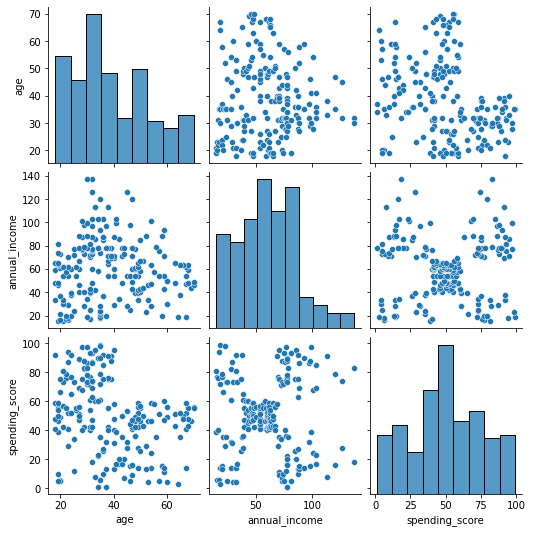

In [16]:
import seaborn as sns
sns.pairplot(df[["age","annual_income","spending_score"]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[["spending_score"]])
df["spending_score"]=scaler.transform(df[["spending_score"]])
scaler.fit(df[["annual_income"]])
df["annual_income"]=scaler.transform(df[["annual_income"]])

In [17]:
k=KMeans(n_clusters=5)

In [18]:
df["cluster"]=k.fit_predict(df[["spending_score","annual_income"]])

In [19]:
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [20]:
k.cluster_centers_.ndim

2

In [21]:
x1=df[df["cluster"]==0]
x2=df[df["cluster"]==1]
x3=df[df["cluster"]==2]
x4=df[df["cluster"]==3]
x5=df[df["cluster"]==4]

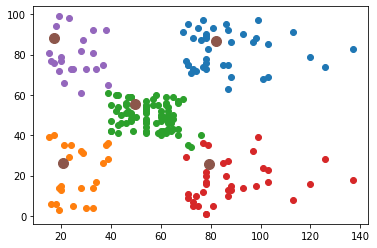

In [22]:
plt.scatter(x1["annual_income"],x1["spending_score"])
plt.scatter(x2["annual_income"],x2["spending_score"])
plt.scatter(x3["annual_income"],x3["spending_score"])
plt.scatter(x4["annual_income"],x4["spending_score"])
plt.scatter(x5["annual_income"],x5["spending_score"])
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=100)

# elbow methods

In [38]:
#calculter elbow methos in k means method by using sse=sse1+sse2+.....+sseN
n=range(1,10)
sse=[]
for i in n:
    k_m=KMeans(n_clusters=i,)
    pr=k_m.fit_predict(df[["spending_score","annual_income"]])
    ine=k_m.inertia_
    sse.append(ine)
    

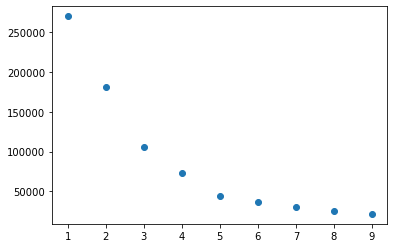

In [39]:
plt.scatter(n,sse)

# silhouette method

In [43]:
from sklearn import metrics

In [50]:
for i in range(2,12):
    l=KMeans(n_clusters=i).fit(df[["spending_score","annual_income"]]).labels_
    print(metrics.silhouette_score(df[["spending_score","annual_income"]],l,metric="euclidean",sample_size=1000))

0.2968969162503008
0.4676135815877543
0.4931963109249047
0.553931997444648
0.5379675585622219
0.5264283703685728
0.45817635224137165
0.45819645551960536
0.45275118302579015
0.4458146093397818


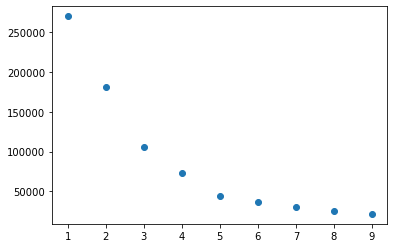

In [51]:
#lbow method
# by using lbow plot we find numberof clusters if we want to plot the lbow plot we find sse for each cluster 
n=range(1,10)
sse_c=[]
for i in n:
    k_c=KMeans(n_clusters=i)
    k_c.fit_predict(df[["spending_score","annual_income"]])
    sse_c.append(k_c.inertia_)
plt.scatter(n,sse_c)

In [55]:
score=[]
for i in range(2,10):
    k_=KMeans(n_clusters=i).fit(df[["spending_score","annual_income"]]).labels_
    score.append(metrics.silhouette_score(df[["spending_score","annual_income"]],k_))
    print(f"cluster {i}---score-->",metrics.silhouette_score(df[["spending_score","annual_income"]],k_))
max(score)

cluster 2---score--> 0.28622678604047447
cluster 3---score--> 0.46761358158775435
cluster 4---score--> 0.4931963109249047
cluster 5---score--> 0.553931997444648
cluster 6---score--> 0.53976103063432
cluster 7---score--> 0.5288104473798049
cluster 8---score--> 0.45732611752686836
cluster 9---score--> 0.4565077334305076


0.553931997444648

## agglomarative clusturing

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [57]:
df=make_blobs(n_samples=300,n_features=2,centers=4,cluster_std=1.2)

In [59]:
data=df[0]

In [60]:
from scipy.cluster import hierarchy

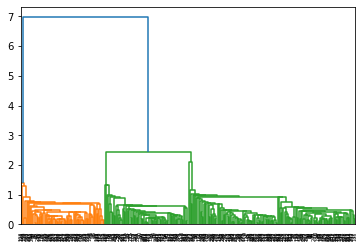

In [62]:
den=hierarchy.dendrogram(hierarchy.linkage(data))

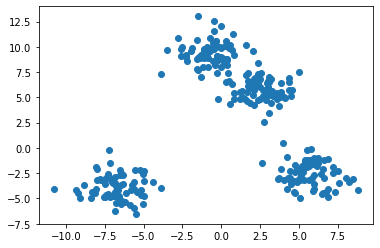

In [65]:
plt.scatter(data[:,0],data[:,1])

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
agg=AgglomerativeClustering(n_clusters=3)

In [68]:
hc=agg.fit_predict(data)

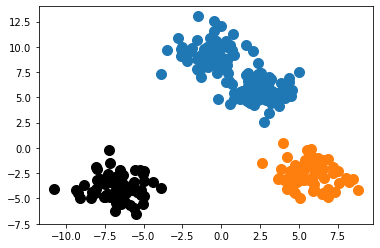

In [75]:
plt.scatter(data[hc==0,0],data[hc==0,1],s=100)
plt.scatter(data[hc==1,0],data[hc==1,1],s=100)
plt.scatter(data[hc==2,0],data[hc==2,1],s=100,color="k")
#plt.scatter(data[hc==3,0],data[hc==3,1],s=100,color="k")


In [74]:
hc

array([1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1], d

# DB scan
#### steps of DBSCA
### ---> importing dataset
### ---> import DBSCAN from sklearn
### ---->fiting the model

In [76]:

from sklearn.datasets import make_circles

In [147]:
df=pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv")

In [134]:
data=df[0]

In [135]:
from sklearn.cluster import DBSCAN

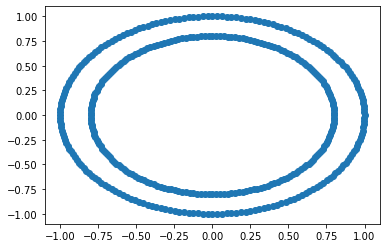

In [136]:
plt.scatter(data[:,0],data[:,1])

In [148]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [151]:
data=df.iloc[:,3:]
db=DBSCAN(eps=3,min_samples=4)


In [153]:
m=db.fit_predict(data)

In [157]:
import numpy as np

In [158]:
db.core_sample_indices_

array([ 58,  59,  62,  64,  66,  67,  69,  72,  74,  75,  76,  77,  78,
        80,  81,  83,  85,  87,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 119, 129, 131, 136, 137, 151, 153, 155, 170],
      dtype=int64)

In [162]:
score=np.zeros_like(m,dtype=bool)

In [163]:
score[db.core_sample_indices_]=True

In [165]:
m

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [164]:
score

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [166]:
len(set(m))-(1 if -1 in m else 0)

9

In [167]:
(1 if -1 in m else 0)

1

In [168]:
len(set(m))

10

In [169]:
metrics.silhouette_score(data,m)

-0.1908319132560097

In [ ]:
r6gt7hy8ju9ki0lo-p;=['\']